In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
IODEPTH_RESULT = './iodepth_results.json'
result_jsons = {}
with open(IODEPTH_RESULT, 'r') as f:
    result_jsons = json.load(f)


In [3]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         39 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  4
  On-line CPU(s) list:   0-3
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Celeron(R) N5105 @ 2.00GHz
    CPU family:          6
    Model:               156
    Thread(s) per core:  1
    Core(s) per socket:  4
    Socket(s):           1
    Stepping:            0
    CPU max MHz:         2900.0000
    CPU min MHz:         800.0000
    BogoMIPS:            3993.60
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss 
                         ht tm pbe syscall nx rdtscp lm constant_tsc art arch_pe
                         rfmon pebs bts rep_good nopl xtopology nonstop_tsc cpui
                         d aperfmperf tsc_known_freq pni pclmulqdq dtes64 monito
    

In [4]:
df = pd.json_normalize(result_jsons)
cores1 = df[df['experiment_name'] == "SingleCPU"].copy()
cores2 = df[df['experiment_name'] == 'TwoCPU'].copy()


In [5]:
def read_iops(jobs):
     return jobs[0]['read']['iops']

def write_iops(jobs):
    # We have group reporting turned on. So read of the first job
     return jobs[0]['write']['iops']

def median_latency(jobs):
    # Some metrics are easier to etract via a json, fow now we'll brute force it
    # jobs_pd = pd.json_normalize(jobs, max_level=0)
    median_lat = jobs[0]['read']['lat_ns']['percentile']['50.000000']
    return median_lat

def test_transform(x):
    return 10

def summarize_df(df):
    df['readiops'] = df['jobs'].map(read_iops)
    df['writeiops'] = df['jobs'].map(write_iops)
    df['median_lat'] = df['jobs'].map(median_latency)
    df['iodepth'] = df['global options.iodepth'].astype(int)

summarize_df(cores1)
summarize_df(cores2)

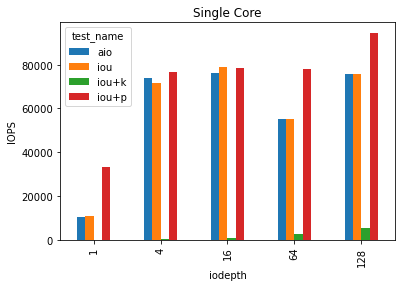

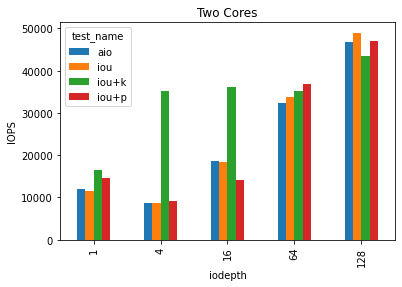

In [6]:
cores1.pivot(index="iodepth", columns="test_name", values="readiops").plot(kind="bar")
plt.ylabel("IOPS")
plt.title("Single Core")
plt.show()


cores2.pivot(index="iodepth", columns="test_name", values="readiops").plot(kind="bar")
plt.ylabel("IOPS")
plt.title("Two Cores")
plt.show()

<AxesSubplot:xlabel='readiops'>

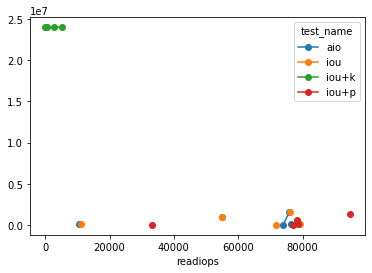

In [16]:
cores1.pivot(index="readiops", columns="test_name", values="median_lat").plot(marker='o')
